In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sklearn.preprocessing as skl
from PIL import Image, ImageOps
from os import scandir, getcwd
from os import listdir
import os
from os.path import isfile, join
import zipfile                          # Per importació a partir de ZIP
import io

In [32]:
with zipfile.ZipFile("./PACK.zip", 'r') as zip_ref:
    zip_ref.extractall("./")


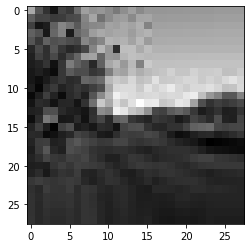

In [33]:
filelistTEST = [f for f in listdir("./PACK/TEST") if isfile(join("./PACK/TEST", f))]            # Guardem a una llista tots els fitxer d'imatges que haurem de llegir
test = np.array([np.array(Image.open("./PACK/TEST/" + fname)) for fname in filelistTEST])                        # Llegim totes les imatges a una variable matriu (3D)

filelistTRAIN = [f for f in listdir("./PACK/TRAIN") if isfile(join("./PACK/TRAIN", f))]         # Guardem a una llista tots els fitxer d'imatges que haurem de llegir
train = np.array([np.array(Image.open("./PACK/TRAIN/" + fname)) for fname in filelistTRAIN])                      # Llegim totes les imatges a una variable matriu (3D)

# Provem que se'ns hagin guardat les imatges
plt.figure()                                   # Obrir figura per representar imatge
imatge = plt.imshow(test[1,:,:], cmap='gray')    # Mostrar imatge a la figura oberta

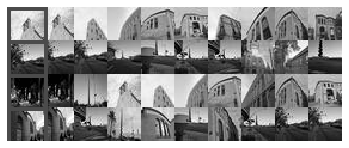

In [34]:
NTRAIN=len(train[:,1,1])  # Núm d'imatges de train
NTEST=len(test[:,1,1])    # Núm d'imatges de test

# Juntem les dues dimensions de cada imatge en una línia
train2 = np.reshape(train, (NTRAIN,(28*28)))
test2 = np.reshape(test, (NTEST,(28*28)))

# Normalitzem els valors imatge per imatge
train2 = skl.normalize(train2)     # Per defecte es normalitzen per la norma L2
test2 = skl.normalize(test2)

# Transposem una matriu
train2 = train2.transpose()

similarities = np.matmul(test2, train2)

ranks = np.argsort(similarities, axis=1)[:,::-1]

# Visualització de resultats a partir de codi de la presentació (Lab0b:Cerca Visual):
# get the original images for visualization
x_train_images = np.reshape(train, (NTRAIN, 28, 28))
x_test_images = np.reshape(test, (NTEST, 28, 28))

h,w = (28, 28)
new_image= Image.new('RGB', (h*10,w*4))

# Visualize ranks of the 10 queries
offset = 0 # it will show results from query #'offset' to #offset+10    900
for q in range(4):                                                      # 10
  ranks_q = ranks[q*(offset+1),:]
  for i in range(10):                                                   #15
      new_image.paste( Image.fromarray(x_train_images[ranks_q[i]]), (h*(1+i),w*q ))

  # visualize query
  ima_q = Image.fromarray(x_test_images[q*(offset+1),...])
  ima_q = ImageOps.expand(ima_q, border=3, fill='green')

  new_image.paste(ima_q, (0,w*q))

plt.figure()
plt.imshow(new_image)
plt.axis('off')
plt.show()
